# Horas pico y valle

In [102]:
import pickle
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [107]:
#Se carga el dataframe df_provincias

fh = open("df_provincias.pkl", "rb")
df_provincias = pickle.load(fh)
fh.close()

In [108]:
#Se carga la información sobre el consumo

df_consumo = pd.read_csv("DemandaReal_2015-2021.csv", delimiter = ";")
df_consumo.drop(["id", "name", "geoid", "geoname", "datetime"], axis = 1, inplace = True)
df_consumo.columns = ["consumo"]
df_consumo = df_consumo.apply(lambda x : round(x, 2))
df_consumo

,consumo
0,25435.00
1,24511.50
2,22866.17
3,21392.83
4,20319.67
...,...
54019,27516.33
54020,29434.83
54021,29709.17
54022,28416.50


In [114]:
#Se junta todo en un único dataframe

df_picosvalle = pd.concat([df_provincias.iloc[:,:4], df_consumo], axis = 1)
df_picosvalle

,value,date,time,weekday,consumo
0,65.41,2015-01-01,00,4,25435.00
1,64.92,2015-01-01,01,4,24511.50
2,64.48,2015-01-01,02,4,22866.17
3,59.32,2015-01-01,03,4,21392.83
4,56.04,2015-01-01,04,4,20319.67
...,...,...,...,...,...
54019,42.19,2021-02-28,19,7,27516.33
54020,47.78,2021-02-28,20,7,29434.83
54021,46.27,2021-02-28,21,7,29709.17
54022,37.03,2021-02-28,22,7,28416.50


In [115]:
#Se crea la variable "precio_consumo", que tiene en cuenta tanto el precio como el consumo horario
#Y se eliminan las columnas que no son necesarias

df_picosvalle["precio_consumo"] = df_picosvalle["value"]*df_picosvalle["consumo"]
df_picosvalle["fin_de_semana"] = 0

for i in range(df_picosvalle.shape[0]):
    if df_picosvalle.loc[i, "weekday"] == 6 or df_picosvalle.loc[i, "weekday"] == 7:
        df_picosvalle.loc[i, "fin_de_semana"] = 1

df_picosvalle.drop(["date", "value","weekday", "consumo"], axis = 1, inplace = True)
df_picosvalle

,time,precio_consumo,fin_de_semana
0,00,1.663703e+06,0
1,01,1.591287e+06,0
2,02,1.474411e+06,0
3,03,1.269023e+06,0
4,04,1.138714e+06,0
...,...,...,...
54019,19,1.160914e+06,1
54020,20,1.406396e+06,1
54021,21,1.374643e+06,1
54022,22,1.052263e+06,1


In [116]:
#Se obtiene el dataframe para los días de diario (de lunes a viernes)

df_diario = df_picosvalle.groupby(["fin_de_semana", "time"]).mean()
df_diario = df_diario.loc[0,:].sort_values("precio_consumo", ascending = False)
df_diario.reset_index(inplace = True)
df_diario

,time,precio_consumo
0,20,2.108219e+06
1,21,2.069517e+06
2,19,2.051533e+06
3,11,2.018509e+06
4,12,2.013804e+06
5,10,2.008788e+06
6,13,1.993619e+06
7,09,1.963552e+06
8,18,1.962255e+06
9,14,1.891309e+06


In [117]:
#Se normalizan los valores de "precio_consumo" para facilitar su comprensión y poder graficarlos

maximo = df_diario["precio_consumo"].max()

for i in range(df_diario.shape[0]):
    df_diario.loc[i, "precio_consumo"] = round(df_diario.loc[i, "precio_consumo"]/maximo, 3)
    
df_diario

,time,precio_consumo
0,20,1.000
1,21,0.982
2,19,0.973
3,11,0.957
4,12,0.955
5,10,0.953
6,13,0.946
7,09,0.931
8,18,0.931
9,14,0.897


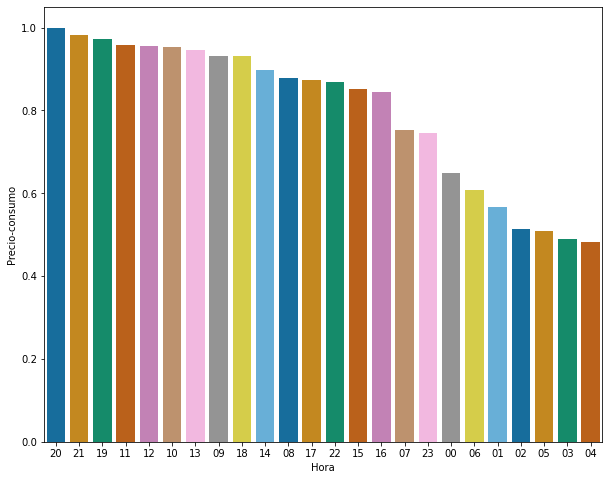

In [118]:
os.chdir("C:\\Users\\javi.JAVI.001\\Desktop\\NEOLAND\\Memoria")

fig, ax = plt.subplots(figsize = (10,8))
sns.barplot(x = df_diario["time"], y = df_diario["precio_consumo"], palette = "colorblind")
ax.set(xlabel = "Hora", ylabel = "Precio-consumo")
plt.savefig("diario.png")
plt.show()

In [119]:
#Se obtiene el dataframe para los días de fin de semana

df_finde = df_picosvalle.groupby(["fin_de_semana", "time"]).mean()
df_finde = df_finde.loc[1,:].sort_values("precio_consumo", ascending = False)
df_finde.reset_index(inplace = True)
df_finde

,time,precio_consumo
0,21,1.723799e+06
1,20,1.647700e+06
2,22,1.613702e+06
3,19,1.529141e+06
4,13,1.433585e+06
5,12,1.411854e+06
6,11,1.410931e+06
7,23,1.408188e+06
8,14,1.392342e+06
9,18,1.389665e+06


In [120]:
#Se normalizan los valores de "precio_consumo" para facilitar su comprensión y poder graficarlos

maximo = df_finde["precio_consumo"].max()

for i in range(df_diario.shape[0]):
    df_finde.loc[i, "precio_consumo"] = round(df_finde.loc[i, "precio_consumo"]/maximo, 3)
    
df_finde

,time,precio_consumo
0,21,1.000
1,20,0.956
2,22,0.936
3,19,0.887
4,13,0.832
5,12,0.819
6,11,0.819
7,23,0.817
8,14,0.808
9,18,0.806


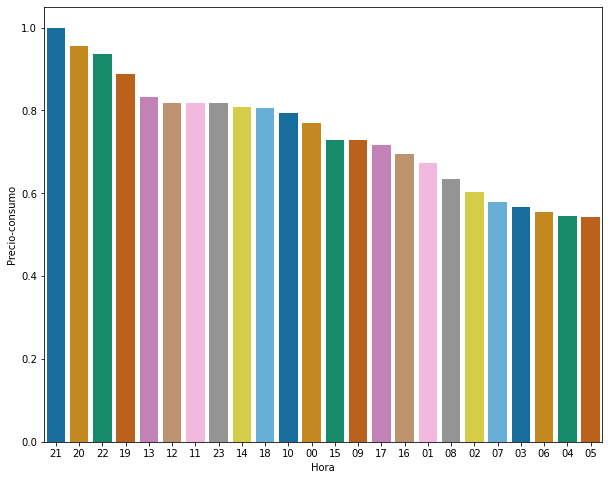

In [121]:
os.chdir("C:\\Users\\javi.JAVI.001\\Desktop\\NEOLAND\\Memoria")

fig, ax = plt.subplots(figsize = (10,8))
sns.barplot(x = df_finde["time"], y = df_finde["precio_consumo"], palette = "colorblind")
ax.set(xlabel = "Hora", ylabel = "Precio-consumo")
plt.savefig("finde.png")
plt.show()